# TASK 1 IRIS FLOWER CLASSIFICATION.
MASTER SIMMI

## 1. Import Necessary Libraries

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

## 2. Load the iris dataset

In [417]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


 Returns tuple of shape (Rows, columns) of dataframe

# 3. Data exploration and preprocessing: 

In [418]:
df.shape

(150, 6)

Dropping the Column

In [419]:
df = df.drop(columns = ['Id']) # delete a column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [420]:
df.describe() # to display stats about data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Display no. of samples on each class

In [422]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [423]:
df.isnull().sum() # check for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 4. data visualization / Exploratory Data Analysis
### 3.1 Histogram 

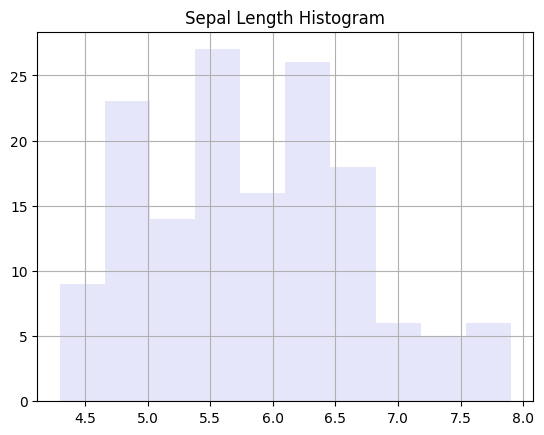

<Figure size 1000x800 with 0 Axes>

In [512]:
df['SepalLengthCm'].hist(color='Lavender')
plt.title("Sepal Length Histogram")
plt.figure(figsize=(10,8))
plt.show()


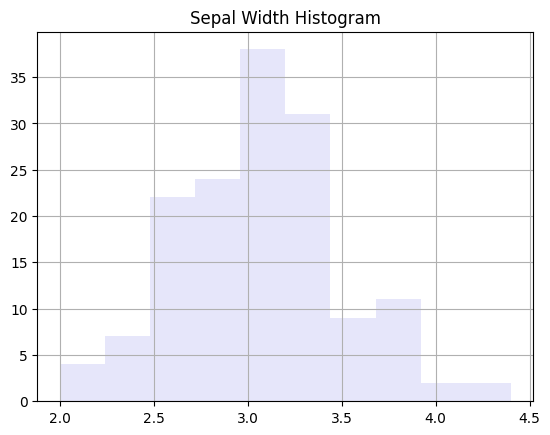

<Figure size 1000x800 with 0 Axes>

In [514]:
df['SepalWidthCm'].hist(color='Lavender')
plt.title("Sepal Width Histogram")
plt.figure(figsize=(10,8))
plt.show()

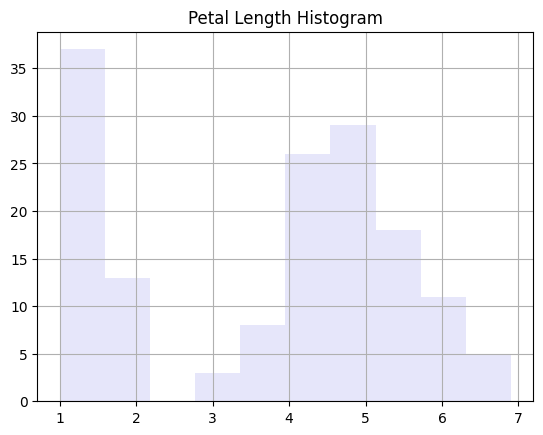

<Figure size 1000x800 with 0 Axes>

In [513]:
df['PetalLengthCm'].hist(color='Lavender')
plt.title("Petal Length Histogram")
plt.figure(figsize=(10,8))
plt.show()

### 3.2  Color and Species Lists for Iris Data Scatter Plot

In [427]:
# scatterplot
colors = ['Blue', 'Green', 'Purple']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

Scatter Plot of Iris Sepal and Petal Width by Species

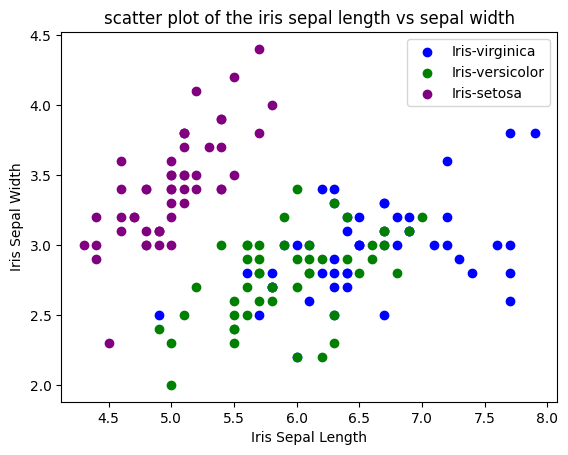

In [428]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    plt.title("scatter plot of the iris sepal length vs sepal width")
plt.xlabel("Iris Sepal Length")
plt.ylabel("Iris Sepal Width")
plt.legend()

generates a scatter plot of the iris sepal length vs sepal width for each species, with a legend for the species. The title of this plot could be "Iris Sepal Length vs Width by Species

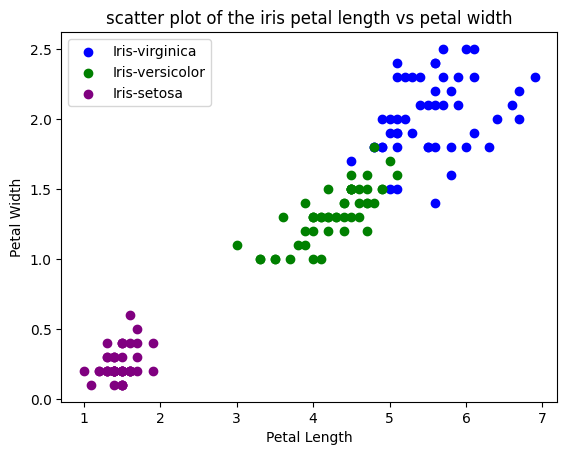

In [429]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.title("scatter plot of the iris petal length vs petal width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

generates a scatter plot of the iris petal length vs petal width for each species, with a legend for the species. The title of this plot could be "Iris Petal Length vs Width by Species

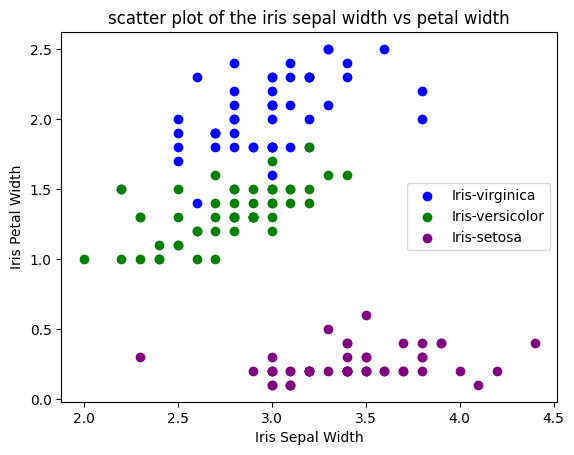

In [430]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.title("scatter plot of the iris sepal width vs petal width")
plt.xlabel("Iris Sepal Width")
plt.ylabel("Iris Petal Width")
plt.legend()

generates a scatter plot of the iris sepal width vs petal width for each species, with a legend for the species. The title of this plot could be "Iris Sepal and Petal Width Comparison by Species

In [431]:
df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### 3.3 Correlation Heatmap of Dataframe Variables

Text(0.5, 0.98, 'Correlation Heatmap of Dataframe Variables')

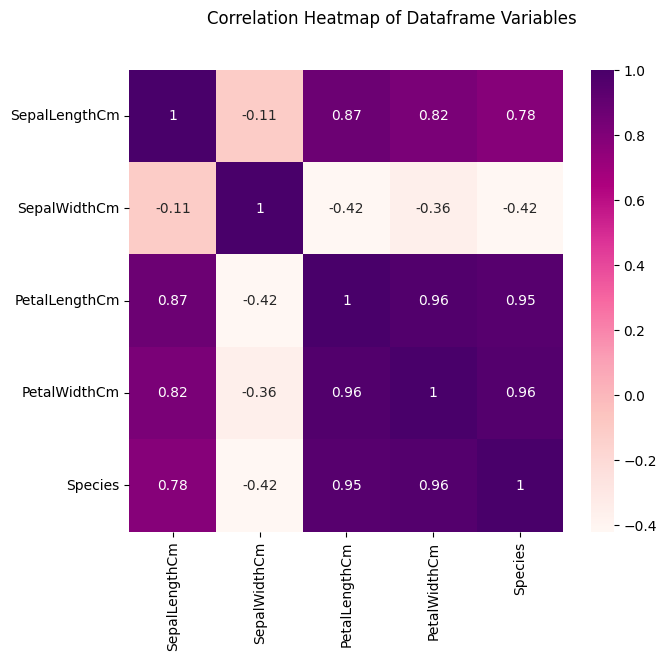

In [490]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, annot=True, ax=ax, cmap='RdPu')
fig.suptitle("Correlation Heatmap of Dataframe Variables")

## Encode the categorical variable Species:

In [433]:
le = LabelEncoder() # used for encoding categorical data numerically.
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 5. Split the dataset :

In [434]:
# split the data into predictors and response
X = df.drop(columns=['Species'])
Y = df['Species']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

divide the data into two parts to evaluate the performance of a machine learning model. The model is trained on the training data and tested on the testing data. This helps to avoid overfitting, which is a common problem in machine learning where a model performs well on the training data but poorly on unseen data

# 6. Model training:

##  6.1  Train a logistic regression Classifier on the training data:

In [435]:
lr = LogisticRegression()

In [436]:
lr.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation:

In [437]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.36842105263158


In [438]:

# evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print the results
print("Accuracy:", accuracy)  #: the fraction of correct predictions the model makes
print("Precision:", precision)#: the fraction of positive predictions that are actually positive
print("Recall:", recall)      #: the fraction of positive cases the model can identify
print("F1-Score:", f1)        # the weighted average of precision and recall

Accuracy: 0.9736842105263158
Precision: 0.9757085020242916
Recall: 0.9736842105263158
F1-Score: 0.9737231968810917


## 6.2  Train a knn - k-nearest neighbours Classifier on the training data:

In [439]:
KNC = KNeighborsClassifier()

In [440]:
KNC.fit(x_train, y_train)

KNeighborsClassifier()

### Model Evaluation:

In [441]:
print("Accuracy: ",model.score(x_test, y_test) * 100)   #metric to get performance

Accuracy:  97.36842105263158


In [442]:

# evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print the results
print("Accuracy:", accuracy)  #: the fraction of correct predictions the model makes
print("Precision:", precision)#: the fraction of positive predictions that are actually positive
print("Recall:", recall)      #: the fraction of positive cases the model can identify
print("F1-Score:", f1)        # the weighted average of precision and recall

Accuracy: 0.9736842105263158
Precision: 0.9757085020242916
Recall: 0.9736842105263158
F1-Score: 0.9737231968810917


## 6.3  Train a Decision Tree Classifier on the training data:

In [443]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

### Model Evaluation:

In [444]:
print("Accuracy: ",model.score(x_test, y_test) * 100)    #metric to get performance

Accuracy:  97.36842105263158


In [445]:

# evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print the results
print("Accuracy:", accuracy)  #: the fraction of correct predictions the model makes
print("Precision:", precision)#: the fraction of positive predictions that are actually positive
print("Recall:", recall)      #: the fraction of positive cases the model can identify
print("F1-Score:", f1)        # the weighted average of precision and recall

Accuracy: 0.9736842105263158
Precision: 0.9757085020242916
Recall: 0.9736842105263158
F1-Score: 0.9737231968810917


RandomForestClassifier

In [446]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

# Predict the species of flowers on the testing data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9736842105263158


# 6. Predict the species of flowers on the testing data:

In [447]:
y_pred = dt.predict(x_test)
print (y_pred )
print (x_test)

[1 2 2 0 2 2 0 1 2 0 1 1 2 2 2 2 1 0 1 0 1 0 2 0 1 2 0 0 0 0 1 1 1 2 0 2 2
 1]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
58             6.6           2.9            4.6           1.3
138            6.0           3.0            4.8           1.8
111            6.4           2.7            5.3           1.9
15             5.7           4.4            1.5           0.4
147            6.5           3.0            5.2           2.0
72             6.3           2.5            4.9           1.5
5              5.4           3.9            1.7           0.4
75             6.6           3.0            4.4           1.4
124            6.7           3.3            5.7           2.1
40             5.0           3.5            1.3           0.3
57             4.9           2.4            3.3           1.0
95             5.7           3.0            4.2           1.2
132            6.4           2.8            5.6           2.2
101            5.8           2.7            5.1      

# 7. Evaluate the performance of the classifier using confusion matrix and accuracy score:

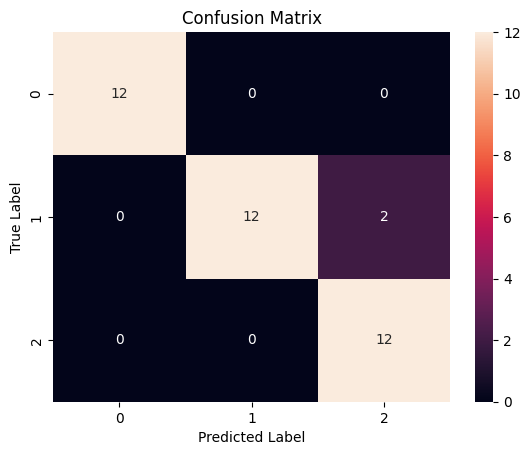

Accuracy: 0.9473684210526315


In [449]:
# Compute the confusion matrix
c_matrix = confusion_matrix(y_test, y_pred) #2D array that shows the number of correct and incorrect predictions for each class in the test set

# Plot the confusion matrix
sns.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
